In [2]:
import os 

In [4]:
#切换目录
path = 'D:\\opt\\kaggle-nlp'
files = os.listdir(path)
os.chdir(path)
os.getcwd()

'D:\\opt\\kaggle-nlp'

In [5]:
#查看目录下文件
files

['labeledTrainData.tsv',
 'sampleSubmission.csv',
 'testData.tsv',
 'unlabeledTrainData.tsv']

In [8]:
#载入数据集
'''
这里，header=0表示文件的第一行包含列名，delimiter=\t表示字段由制表符分隔，quoting=3让 Python 忽略双引号，否则试图读取文件时，可能会遇到错误。
'''
import pandas as pd       
train = pd.read_csv("labeledTrainData.tsv", header=0, \
                    delimiter="\t", quoting=3)

In [10]:
train.shape

(25000, 3)

In [11]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [14]:
print (train["review"][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [15]:
from bs4 import BeautifulSoup  

In [17]:
#删除 <br/>
# 调用get_text()会为你提供不带标签的评论文本
example1 = BeautifulSoup(train["review"][0])  
print (train["review"][0])
print (example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [18]:
# 处理标点符号，数字和停止词：NLTK 和正则表达式
import re
# 使用正则表达式执行查找和替换
'''
[]表示分组成员而^表示“不”就足够了。 
换句话说，上面的re.sub()语句说：“查找任何不是小写字母（a-z）或大写字母（A-Z）的内容，并用空格替换它。”
'''
letters_only = re.sub("[^a-zA-Z]",           # 要查找的模式串
                      " ",                   # 要替换成的模式串
                      example1.get_text() )  # 要从中查找的字符串
print (letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [19]:
lower_case = letters_only.lower()        # 转换为小写

In [20]:
lower_case

' with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for    m

In [21]:
words = lower_case.split()               # 分割为单词

In [22]:
words

['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with',
 'mj',
 'i',
 've',
 'started',
 'listening',
 'to',
 'his',
 'music',
 'watching',
 'the',
 'odd',
 'documentary',
 'here',
 'and',
 'there',
 'watched',
 'the',
 'wiz',
 'and',
 'watched',
 'moonwalker',
 'again',
 'maybe',
 'i',
 'just',
 'want',
 'to',
 'get',
 'a',
 'certain',
 'insight',
 'into',
 'this',
 'guy',
 'who',
 'i',
 'thought',
 'was',
 'really',
 'cool',
 'in',
 'the',
 'eighties',
 'just',
 'to',
 'maybe',
 'make',
 'up',
 'my',
 'mind',
 'whether',
 'he',
 'is',
 'guilty',
 'or',
 'innocent',
 'moonwalker',
 'is',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'which',
 'i',
 'remember',
 'going',
 'to',
 'see',
 'at',
 'the',
 'cinema',
 'when',
 'it',
 'was',
 'originally',
 'released',
 'some',
 'of',
 'it',
 'has',
 'subtle',
 'messages',
 'about',
 'mj',
 's',
 'feeling',
 'towards',
 'the',
 'press',
 'and',
 'also',
 'the',
 'obvious',
 'message',
 'of',
 'drugs',

In [26]:
# 使用nltk来获取停止词列表
import nltk
from nltk.corpus import stopwords # 导入停止词列表
print (stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
# 从 "words" 中移除停止词
words = [w for w in words if not w in stopwords.words("english")]
print (words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [36]:
# 把上面的代码打包成模块
def review_to_words( raw_review ):
    # 将原始评论转换为单词字符串的函数
    # 输入是单个字符串（原始电影评论），
    # 输出是单个字符串（预处理过的电影评论）
    # 1. 移除 HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. 移除非字母        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. 转换为小写，分成单个单词
    words = letters_only.lower().split()                             
    #
    # 4. 在Python中，搜索集合比搜索列表快得多，
    #    所以将停止词转换为一个集合
    stops = set(stopwords.words("english"))                  
    # 
    # 5. 删除停止词
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. 将单词连接成由空格分隔的字符串，
    #    并返回结果。
#     print (meaningful_words)
    return( " ".join( meaningful_words )) 

In [41]:
# clean_review = review_to_words( train["review"][0] )
# print (clean_review)
# type(clean_review)

In [43]:
# 根据 dataframe 列大小获取评论数
num_reviews = train["review"].size

# 初始化空列表来保存清理后的评论
clean_train_reviews = []

# 遍历每个评论；创建索引 i
# 范围是 0 到电影评论列表长度

print ("Cleaning and parsing the training set movie reviews...\n")
for i in range( 0, num_reviews ):
    # 如果索引被 1000 整除，打印消息
    if( (i+1)%1000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_reviews ) ) 
    # 为每个评论调用我们的函数，
    # 并将结果添加到清理后评论列表中
    clean_train_reviews.append( review_to_words( train["review"][i] ) )

Cleaning and parsing the training set movie reviews...



C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [46]:
clean_train_reviews[1]

'classic war worlds timothy hines entertaining film obviously goes great effort lengths faithfully recreate h g wells classic book mr hines succeeds watched film appreciated fact standard predictable hollywood fare comes every year e g spielberg version tom cruise slightest resemblance book obviously everyone looks different things movie envision amateur critics look criticize everything others rate movie important bases like entertained people never agree critics enjoyed effort mr hines put faithful h g wells classic novel found entertaining made easy overlook critics perceive shortcomings'

# Bag of Words
句子1："The cat sat on the hat"

句子2："The dog ate the cat and the hat"

从这两个句子中，我们的词汇如下：

{ the, cat, sat, on, hat, dog, ate, and }

为了得到我们的词袋，我们计算每个单词出现在每个句子中的次数。在句子 1 中，“the”出现两次，“cat”，“sat”，“on”和“hat”每次出现一次，因此句子 1 的特征向量是：

{ the, cat, sat, on, hat, dog, ate, and }

句子 1：{ 2, 1, 1, 1, 1, 0, 0, 0 }

同样，句子 2 的特征是：{ 3, 1, 0, 0, 1, 1, 1, 1}

在 IMDB 数据中，我们有大量的评论，这将为我们提供大量的词汇。要限制特征向量的大小，我们应该选择最大词汇量。下面，我们使用 5000 个最常用的单词（记住已经删除了停止词）。

In [48]:
#词袋模型
'''
在 IMDB 数据中，我们有大量的评论，这将为我们提供大量的词汇。
要限制特征向量的大小，我们应该选择最大词汇量。
下面，我们使用 5000 个最常用的单词（记住已经删除了停止词）。
'''
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# 初始化 "CountVectorizer" 对象，
# 这是 scikit-learn 的一个词袋工具。
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() 有两个功能：
# 首先，它拟合模型并学习词汇；
# 第二，它将我们的训练数据转换为特征向量。
# fit_transform 的输入应该是字符串列表。
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy 数组很容易使用，因此将结果转换为数组
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [50]:
# 它有 25,000 行和 5,000 个特征（每个词汇一个）。
train_data_features.shape

(25000, 5000)

In [51]:
# 看看词汇表中的单词
vocab = vectorizer.get_feature_names()
print (vocab)

['abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'ad', 'adam', 'adams', 'adaptation', 'adaptations', 'adapted', 'add', 'added', 'adding', 'addition', 'adds', 'adequate', 'admire', 'admit', 'admittedly', 'adorable', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'advertising', 'advice', 'advise', 'affair', 'affect', 'affected', 'afford', 'aforementioned', 'afraid', 'africa', 'african', 'afternoon', 'afterwards', 'age', 'aged', 'agent', 'agents', 'ages', 'aging', 'ago', 'ag

In [54]:
# 打印词汇表中每个单词的计数
import numpy as np

# 求和词汇表中每个单词的计数
dist = np.sum(train_data_features, axis=0)

# 对于每个词，打印它和它在训练集中的出现次数
for tag, count in zip(vocab, dist):
    print (count, tag)

187 abandoned
125 abc
108 abilities
454 ability
1259 able
85 abraham
116 absence
83 absent
352 absolute
1485 absolutely
306 absurd
192 abuse
91 abusive
98 abysmal
297 academy
485 accent
203 accents
300 accept
130 acceptable
144 accepted
92 access
318 accident
200 accidentally
88 accompanied
124 accomplished
296 according
186 account
81 accuracy
284 accurate
123 accused
179 achieve
139 achieved
124 achievement
90 acid
971 across
1251 act
658 acted
6490 acting
3354 action
311 actions
83 activities
2389 actor
4486 actors
1219 actress
369 actresses
394 acts
793 actual
4237 actually
148 ad
302 adam
98 adams
453 adaptation
80 adaptations
154 adapted
810 add
439 added
166 adding
347 addition
337 adds
113 adequate
124 admire
621 admit
134 admittedly
101 adorable
510 adult
376 adults
100 advance
90 advanced
153 advantage
510 adventure
204 adventures
91 advertising
259 advice
90 advise
346 affair
93 affect
113 affected
104 afford
126 aforementioned
343 afraid
212 africa
255 african
187 afternoon

117 eve
12646 even
246 evening
373 event
910 events
720 eventually
5995 ever
3978 every
411 everybody
167 everyday
2222 everyone
2321 everything
190 everywhere
223 evidence
127 evident
1448 evil
468 ex
189 exact
995 exactly
120 exaggerated
79 examination
1373 example
181 examples
2070 excellent
1129 except
401 exception
148 exceptional
86 exceptionally
87 excessive
80 exchange
230 excited
221 excitement
515 exciting
419 excuse
241 executed
189 execution
132 executive
130 exercise
300 exist
114 existed
259 existence
161 existent
161 exists
104 exotic
1176 expect
404 expectations
704 expected
588 expecting
81 expedition
140 expensive
1059 experience
192 experienced
200 experiences
170 experiment
79 experimental
90 experiments
176 expert
451 explain
285 explained
107 explaining
193 explains
290 explanation
119 explicit
233 exploitation
92 exploration
118 explore
106 explored
112 explosion
109 explosions
117 exposed
82 exposure
189 express
83 expressed
169 expression
155 expressions
115 ex

2012 nice
299 nicely
92 nicholas
113 nicholson
293 nick
82 nicole
2163 night
318 nightmare
108 nightmares
130 nights
161 nine
86 ninja
100 niro
152 noble
452 nobody
419 noir
137 noise
222 nominated
98 nomination
898 non
1032 none
163 nonetheless
286 nonsense
82 nonsensical
457 normal
304 normally
127 norman
213 north
146 nose
91 nostalgia
97 nostalgic
168 notable
119 notably
199 notch
718 note
144 noted
123 notes
4290 nothing
366 notice
272 noticed
104 notion
172 notorious
86 novak
958 novel
168 novels
167 nowadays
443 nowhere
129 nuclear
198 nude
596 nudity
1006 number
403 numbers
270 numerous
125 nurse
88 nuts
86 nyc
142 object
79 objective
164 obnoxious
119 obscure
235 obsessed
162 obsession
1066 obvious
1163 obviously
106 occasion
193 occasional
256 occasionally
112 occur
114 occurred
131 occurs
103 ocean
582 odd
160 oddly
108 odds
104 offended
211 offensive
378 offer
192 offered
109 offering
346 offers
567 office
280 officer
107 officers
106 official
1601 often
1449 oh
142 oil
101

167 throws
97 thru
111 thugs
136 thumbs
418 thus
124 ticket
102 tie
149 tied
104 ties
87 tiger
182 tight
213 till
309 tim
12724 time
121 timeless
3235 times
169 timing
94 timon
118 timothy
214 tiny
380 tired
92 tiresome
190 titanic
1497 title
121 titled
172 titles
1243 today
112 todd
2243 together
130 toilet
1063 told
785 tom
88 tomatoes
113 tommy
500 tone
156 tongue
96 tonight
134 tons
522 tony
1100 took
86 tooth
1847 top
160 topic
101 topless
154 torn
300 torture
116 tortured
631 total
1307 totally
472 touch
170 touched
206 touches
435 touching
479 tough
154 tour
285 toward
637 towards
1279 town
169 toy
107 toys
399 track
105 tracks
165 tracy
140 trade
81 trademark
162 tradition
257 traditional
362 tragedy
348 tragic
83 trail
377 trailer
102 trailers
411 train
97 trained
218 training
95 transfer
100 transformation
91 transition
117 translation
124 trap
188 trapped
504 trash
99 trashy
246 travel
101 traveling
105 travels
84 travesty
202 treasure
320 treat
275 treated
235 treatment
97 

In [56]:
#词袋的数字训练特征和每个特征向量的原始情感标签，所以让我们做一些监督学习
#随机森林，我们将树的数量设置为 100 作为合理的默认值
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# 使用 100 棵树初始化随机森林分类器
forest = RandomForestClassifier(n_estimators = 100) 

# 使用词袋作为特征并将情感标签作为响应变量，使森林拟合训练集
# 这可能需要几分钟来运行
forest = forest.fit( train_data_features, train["sentiment"] )

Training the random forest...


In [57]:
#创建提交
'''
剩下的就是在我们的测试集上运行训练好的随机森林并创建一个提交文件。
testData.tsv,此文件包含另外 25,000 条评论和标签；我们的任务是预测情感标签。
'''
# 读取测试数据
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", \
                   quoting=3 )

In [58]:
print (test.shape)

(25000, 2)


In [59]:
test.columns.values

array(['id', 'review'], dtype=object)

In [60]:
# 创建一个空列表并逐个附加干净的评论
num_reviews = len(test["review"])
clean_test_reviews = [] 

In [64]:
print ("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print ("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

Cleaning and parsing the test set movie reviews...



C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [65]:
# 获取测试集的词袋，并转换为 numpy 数组
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

In [74]:
test_data_features.shape

(25000, 5000)

In [67]:
# 使用随机森林进行情感标签预测
result = forest.predict(test_data_features)

In [68]:
# 将结果复制到带有 "id" 列和 "sentiment" 列的 pandas dataframe
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

In [69]:
# 使用 pandas 编写逗号分隔的输出文件,提交
# output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

# word2vec
首先，我们使用pandas读取数据，就像我们在第 1 部分中所做的那样。与第 1 部分不同，我们现在使用unlabeledTrain.tsv，其中包含 50,000 个额外的评论，没有标签。 当我们在第 1 部分中构建词袋模型时，额外的未标记的训练评论没有用。 但是，由于 Word2Vec 可以从未标记的数据中学习，现在可以使用这些额外的 50,000 条评论。

In [75]:
import pandas as pd

# 从文件读取数据
train = pd.read_csv( "labeledTrainData.tsv", header=0, 
                    delimiter="\t", quoting=3 )
test = pd.read_csv( "testData.tsv", header=0, delimiter="\t", quoting=3 )
unlabeled_train = pd.read_csv( "unlabeledTrainData.tsv", header=0, 
                              delimiter="\t", quoting=3 )

# 验证已读取的评论数量（总共 100,000 个）
print ("Read %d labeled train reviews, %d labeled test reviews, " \
       "and %d unlabeled reviews\n" % (train["review"].size,      \
        test["review"].size, unlabeled_train["review"].size ))

Read 25000 labeled train reviews, 25000 labeled test reviews, and 50000 unlabeled reviews



In [76]:
'''
为了训练 Word2Vec，最好不要删除停止词，因为算法依赖于句子的更广泛的上下文，以便产生高质量的词向量。
'''
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist( review, remove_stopwords=False ):
    # 将文档转换为单词序列的函数，可选地删除停止词。 返回单词列表。
    #
    # 1. 移除 HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. 移除非字母
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. 将单词转换为小写并将其拆分
    words = review_text.lower().split()
    #
    # 4. 可选地删除停止词（默认为 false）
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. 返回单词列表
    return(words)

In [77]:
'''
接下来，我们需要一种特定的输入格式。 Word2Vec 需要单个句子，每个句子都是一列单词。 换句话说，输入格式是列表的列表。
如何将一个段落分成句子并不简单。 自然语言中有各种各样的问题。 英语句子可能以“?”，“!”，“"”或“.”等结尾，并且间距和大写也不是可靠的标志。
因此，我们将使用 NLTK 的punkt分词器进行句子分割。
'''
import nltk.data
# 加载 punkt 分词器
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [78]:
# 定义一个函数将评论拆分为已解析的句子
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # 将评论拆分为已解析句子的函数。
    # 返回句子列表，其中每个句子都是单词列表
    # 1. 使用 NLTK 分词器将段落拆分为句子
    raw_sentences = tokenizer.tokenize(review.strip())
    #
    # 2. 遍历每个句子
    sentences = []
    for raw_sentence in raw_sentences:
        # 如果句子为空，则跳过
        if len(raw_sentence) > 0:
            # 否则，调用 review_to_wordlist 来获取单词列表
            sentences.append( review_to_wordlist( raw_sentence, \
              remove_stopwords ))
    # 返回句子列表（每个句子都是单词列表，
    # 因此返回列表的列表）
    return sentences

In [79]:
sentences = []  # 初始化空的句子列表

print ("Parsing sentences from training set")
for review in train["review"]:
    sentences += review_to_sentences(review, tokenizer)

print ("Parsing sentences from unlabeled set")
for review in unlabeled_train["review"]:
    sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set


C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup

Parsing sentences from unlabeled set


C:\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'... ...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Anaconda3\lib\site-packages\bs4\__init__.py:219: U

In [84]:
print (sentences[0])

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again']


注意的一个小细节是 Python 列表中+=和append之间的区别
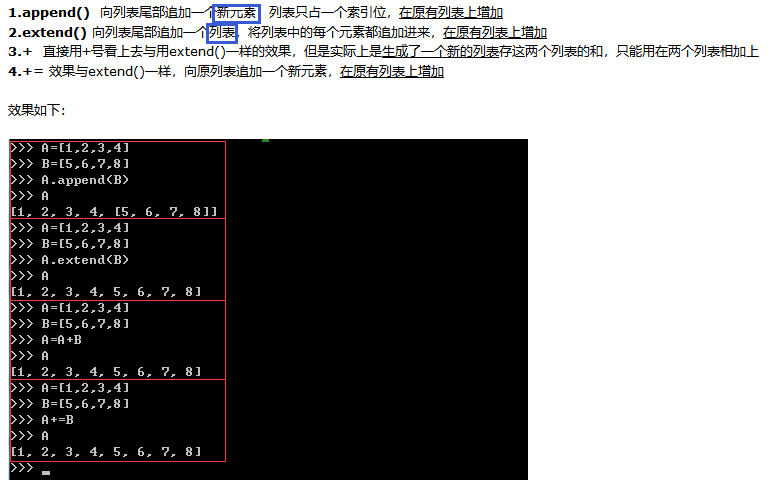

In [87]:
# 导入内置日志记录模块并配置它，以便 Word2Vec 创建良好的输出消息
'''
架构：架构选项是 skip-gram（默认）或 CBOW。 我们发现 skip-gram 非常慢，但产生了更好的结果。
训练算法：分层 softmax（默认）或负采样。 对我们来说，默认效果很好。
对频繁词汇进行下采样：Google 文档建议值介于.00001和.001之间。 对我们来说，接近0.001的值似乎可以提高最终模型的准确性。
单词向量维度：更多特征会产生更长的运行时间，并且通常（但并非总是）会产生更好的模型。 合理的值可能介于几十到几百；我们用了 300。
上下文/窗口大小：训练算法应考虑多少个上下文单词？ 10 似乎适用于分层 softmax（越多越好，达到一定程度）。
工作线程：要运行的并行进程数。 这是特定于计算机的，但 4 到 6 之间应该适用于大多数系统。
最小词数：这有助于将词汇量的大小限制为有意义的单词。 在所有文档中，至少没有出现这个次数的任何单词都将被忽略。 
        合理的值可以在 10 到 100 之间。在这种情况下，由于每个电影出现 30 次，我们将最小字数设置为 40，来避免过分重视单个电影标题。 
        这导致了整体词汇量大约为 15,000 个单词。 较高的值也有助于限制运行时间。
'''
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# 设置各种参数的值
num_features = 300    # 词向量维度
min_word_count = 40   # 最小单词数
num_workers = 6       # 并行运行的线程数
context = 10          # 上下文窗口大小
downsampling = 1e-3   # 为频繁词设置下采样

# 初始化并训练模型（这需要一些时间）
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# 如果你不打算再进一步训练模型，
# 则调用 init_sims 将使模型更具内存效率。
model.init_sims(replace=True)

# 创建有意义的模型名称并保存模型以供以后使用会很有帮助。 
# 你可以稍后使用 Word2Vec.load() 加载它
model_name = "300features_40minwords_10context"
model.save(model_name)

C:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
2018-12-12 15:22:39,337 : INFO : 'pattern' package not found; tag filters are not available for English
2018-12-12 15:22:39,352 : INFO : collecting all words and their counts
2018-12-12 15:22:39,352 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-12-12 15:22:39,384 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 17776 word types
2018-12-12 15:22:39,431 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 24948 word types
2018-12-12 15:22:39,477 : INFO : PROGRESS: at sentence #30000, processed 671315 words, keeping 30034 word types
2018-12-12 15:22:39,540 : INFO : PROGRESS: at sentence #40000, processed 897815 words, keeping 34348 word types


Training model...


2018-12-12 15:22:39,587 : INFO : PROGRESS: at sentence #50000, processed 1116963 words, keeping 37761 word types
2018-12-12 15:22:39,634 : INFO : PROGRESS: at sentence #60000, processed 1338404 words, keeping 40723 word types
2018-12-12 15:22:39,681 : INFO : PROGRESS: at sentence #70000, processed 1561580 words, keeping 43333 word types
2018-12-12 15:22:39,727 : INFO : PROGRESS: at sentence #80000, processed 1780887 words, keeping 45714 word types
2018-12-12 15:22:39,774 : INFO : PROGRESS: at sentence #90000, processed 2004996 words, keeping 48135 word types
2018-12-12 15:22:39,821 : INFO : PROGRESS: at sentence #100000, processed 2226966 words, keeping 50207 word types
2018-12-12 15:22:39,884 : INFO : PROGRESS: at sentence #110000, processed 2446580 words, keeping 52081 word types
2018-12-12 15:22:39,930 : INFO : PROGRESS: at sentence #120000, processed 2668775 words, keeping 54119 word types
2018-12-12 15:22:39,977 : INFO : PROGRESS: at sentence #130000, processed 2894303 words, keep

2018-12-12 15:22:43,398 : INFO : PROGRESS: at sentence #770000, processed 17217759 words, keeping 121703 word types
2018-12-12 15:22:43,445 : INFO : PROGRESS: at sentence #780000, processed 17447905 words, keeping 122402 word types
2018-12-12 15:22:43,492 : INFO : PROGRESS: at sentence #790000, processed 17674981 words, keeping 123066 word types
2018-12-12 15:22:43,508 : INFO : collected 123504 word types from a corpus of 17798082 raw words and 795538 sentences
2018-12-12 15:22:43,508 : INFO : Loading a fresh vocabulary
2018-12-12 15:22:43,586 : INFO : min_count=40 retains 16490 unique words (13% of original 123504, drops 107014)
2018-12-12 15:22:43,586 : INFO : min_count=40 leaves 17238940 word corpus (96% of original 17798082, drops 559142)
2018-12-12 15:22:43,633 : INFO : deleting the raw counts dictionary of 123504 items
2018-12-12 15:22:43,648 : INFO : sample=0.001 downsamples 48 most-common words
2018-12-12 15:22:43,648 : INFO : downsampling leaves estimated 12749658 word corpus 

2018-12-12 15:23:29,020 : INFO : EPOCH 4 - PROGRESS: at 49.27% examples, 1037241 words/s, in_qsize 11, out_qsize 0
2018-12-12 15:23:30,020 : INFO : EPOCH 4 - PROGRESS: at 57.37% examples, 1036707 words/s, in_qsize 10, out_qsize 1
2018-12-12 15:23:31,019 : INFO : EPOCH 4 - PROGRESS: at 65.62% examples, 1039098 words/s, in_qsize 11, out_qsize 0
2018-12-12 15:23:32,035 : INFO : EPOCH 4 - PROGRESS: at 73.96% examples, 1040787 words/s, in_qsize 12, out_qsize 0
2018-12-12 15:23:33,050 : INFO : EPOCH 4 - PROGRESS: at 81.21% examples, 1027035 words/s, in_qsize 11, out_qsize 0
2018-12-12 15:23:34,050 : INFO : EPOCH 4 - PROGRESS: at 88.98% examples, 1023608 words/s, in_qsize 11, out_qsize 0
2018-12-12 15:23:35,065 : INFO : EPOCH 4 - PROGRESS: at 96.97% examples, 1022692 words/s, in_qsize 11, out_qsize 0
2018-12-12 15:23:35,425 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-12-12 15:23:35,425 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-12-12 15

In [95]:
# doesnt_match函数将尝试推断集合中哪个单词与其他单词最不相似：
model.doesnt_match("man woman child kitchen".split())

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  


'kitchen'

In [97]:
# 使用most_similar函数来深入了解模型的单词簇：
model.most_similar("clever")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('witty', 0.7009009122848511),
 ('humorous', 0.6606358885765076),
 ('inventive', 0.6590828895568848),
 ('imaginative', 0.6286353468894958),
 ('innovative', 0.6070367693901062),
 ('suspenseful', 0.601162850856781),
 ('funny', 0.5945674777030945),
 ('subtle', 0.5661023259162903),
 ('unpredictable', 0.564166784286499),
 ('creative', 0.5536960363388062)]

In [102]:
from gensim.models import Word2Vec
model = Word2Vec.load("300features_40minwords_10context")

2018-12-12 20:03:23,774 : INFO : loading Word2Vec object from 300features_40minwords_10context
2018-12-12 20:03:24,086 : INFO : loading wv recursively from 300features_40minwords_10context.wv.* with mmap=None
2018-12-12 20:03:24,086 : INFO : setting ignored attribute vectors_norm to None
2018-12-12 20:03:24,086 : INFO : loading vocabulary recursively from 300features_40minwords_10context.vocabulary.* with mmap=None
2018-12-12 20:03:24,086 : INFO : loading trainables recursively from 300features_40minwords_10context.trainables.* with mmap=None
2018-12-12 20:03:24,086 : INFO : setting ignored attribute cum_table to None
2018-12-12 20:03:24,086 : INFO : loaded 300features_40minwords_10context


In [111]:
model.wv.syn0.shape

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(16490, 300)

In [136]:
# 总词汇量为 16,400个单词
model["flower"].shape

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(300,)

In [144]:
'''
由于每个单词都是 300 维空间中的向量，我们可以使用向量运算来组合每个评论中的单词。 
我们尝试的一种方法是简单地平均给定的评论中的单词向量（为此，我们删除了停止词，这只会增加噪音）。
'''
import numpy as np

def makeFeatureVec(words, model, num_features):
    # 用于平均给定段落中的所有单词向量的函数
    #
    # 预初始化一个空的 numpy 数组（为了速度）
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0.
    # 
    # Index2word 是一个列表，包含模型词汇表中的单词名称。
    # 为了获得速度，将其转换为集合。 
    index2word_set = set(model.wv.index2word)
    #
    # 遍历评论中的每个单词，如果它在模型的词汇表中，
    # 则将其特征向量加到 total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 
    # 将结果除以单词数来获得平均值
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    # 给定一组评论（每个评论都是单词列表），计算每个评论的平均特征向量并返回2D numpy数组
    # 
    # 初始化计数器
    counter = 0
    # 
    # 为了速度，预分配 2D numpy 数组
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    # 
    # 遍历评论
    for review in reviews:
       #
       # 每 1000 个评论打印一次状态消息
        if counter%1000. == 0.:
            print ("Review %d of %d" % (counter, len(reviews)))
       # 
       # 调用生成平均特征向量的函数（定义如上）
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, \
                                                    num_features)
       #
       # 增加计数器
        counter = counter + 1
    return reviewFeatureVecs

In [145]:
# ****************************************************************
# 使用我们在上面定义的函数，
# 计算训练和测试集的平均特征向量。
# 请注意，我们现在删除停止词。

clean_train_reviews = []
for review in train["review"]:
    clean_train_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

trainDataVecs = getAvgFeatureVecs( clean_train_reviews, model, num_features )

print ("Creating average feature vecs for test reviews")
clean_test_reviews = []
for review in test["review"]:
    clean_test_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

testDataVecs = getAvgFeatureVecs( clean_test_reviews, model, num_features )

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Review 0 of 25000


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Creating average feature vecs for test reviews
Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 

In [146]:
# 接下来，使用平均段落向量来训练随机森林。 请注意，与第 1 部分一样，我们只能使用标记的训练评论来训练模型。
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 100 )

print ("Fitting a random forest to labeled training data...")
forest = forest.fit( trainDataVecs, train["sentiment"] )

# 测试和提取结果
result = forest.predict( testDataVecs )

# 写出测试结果
# output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
# output.to_csv( "Word2Vec_AverageVectors.csv", index=False, quoting=3 )

Fitting a random forest to labeled training data...
